In [21]:
# We import all the libraries we need.

import pandas as pd # for data handling (loading, DataFrames manipulation).
import seaborn as sns
import matplotlib.pyplot as plt # to create graphs (e.g. scatter plots, regression lines).
from sklearn.model_selection import train_test_split, cross_val_score # to split the dataset and validate the model.
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV # the linear regression model.
from sklearn.metrics import mean_squared_error, root_mean_squared_error ,r2_score # to evaluate model performance.
from sklearn.preprocessing import StandardScaler # to scale numerical features.



### Data Cleaning and Preprocessing

In [2]:
# Load data
df = pd.read_csv('Algerian_forest_fires_cleaned.csv')

print(df.head())

print(df.describe())

   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  
              day       month    year  Temperature          RH          Ws  \
count  243.000000  243.000000   243.0   243.000000  243.000000  243.000000   
mean    15.761317    7.502058  2012.0    32.152263   62.041152   15.493827   
std      8.842552    1.114793     0.0     3.628039   14.828160    2.811385   
min      1.000000    6.000000  2012.0    22.0

## Meaning of dataset Acronyms

- Temperature – Air temperature (°C)
- RH – Relative Humidity (%)
- Ws – Wind speed (km/h)
- Rain – Rainfall (mm/m²)
- FFMC – Fine Fuel Moisture Code: Index that represents the moisture content of fine fuels. Higher values ​​indicate drier fuels (higher risk of ignition).
- DMC – Duff Moisture Code: Represents the moisture content of intermediate soil layers and leaf litter. Affects the potential for underground fires to develop.
- DC – Drought Code: Measures the dryness of organic materials deep in the soil. Indicates the difficulty of extinguishing underground fires and the duration of the fire.
- ISI – Initial Spread Index: Estimates the initial speed of fire spread. Based on FFMC and wind speed.
- BUI – Build-Up Index: Combination of DMC and DC. Represents the total amount of available fuel.
- FWI – Fire Weather Index: Final composite index that estimates overall fire behavior. Combines FFMC, DMC, DC, ISI, and BUI.
- Classes – Event class: Fire or not fire, indicating whether or not a fire occurred.
- Region – Geographic region (0 or 1, can represent different zones within the study area).

In [3]:
# Checking for null values
print("Null values ​​per column:\n", df.isnull().sum())

Null values ​​per column:
 day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [4]:
# Checking for duplicates
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicate rows: 0


In [5]:
print(df['Classes'].value_counts())

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64


In [6]:
# Remove spaces before or after and make everything lowercase
df['Classes'] = df['Classes'].str.strip().str.lower()

print(df['Classes'].value_counts())

Classes
fire        137
not fire    106
Name: count, dtype: int64


In [7]:
df['Classes'] = df['Classes'].map({'fire': 1, 'not fire': 0})
print(df)

     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
0      1      6  2012           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4   
1      2      6  2012           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2      3      6  2012           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3      4      6  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
4      5      6  2012           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...  ...   ...   
238   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
241   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
242   30      9  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8   

     FWI  Classes  Region  

In [8]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Remove columns that do not directly contribute to the model
df.drop(['day', 'month', 'year'], axis=1, inplace=True) # They have already been merged into 'date'

In [9]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,2012-06-04
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1,2012-09-26
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1,2012-09-27
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1,2012-09-28
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1,2012-09-29


### Data Visualization and Observations

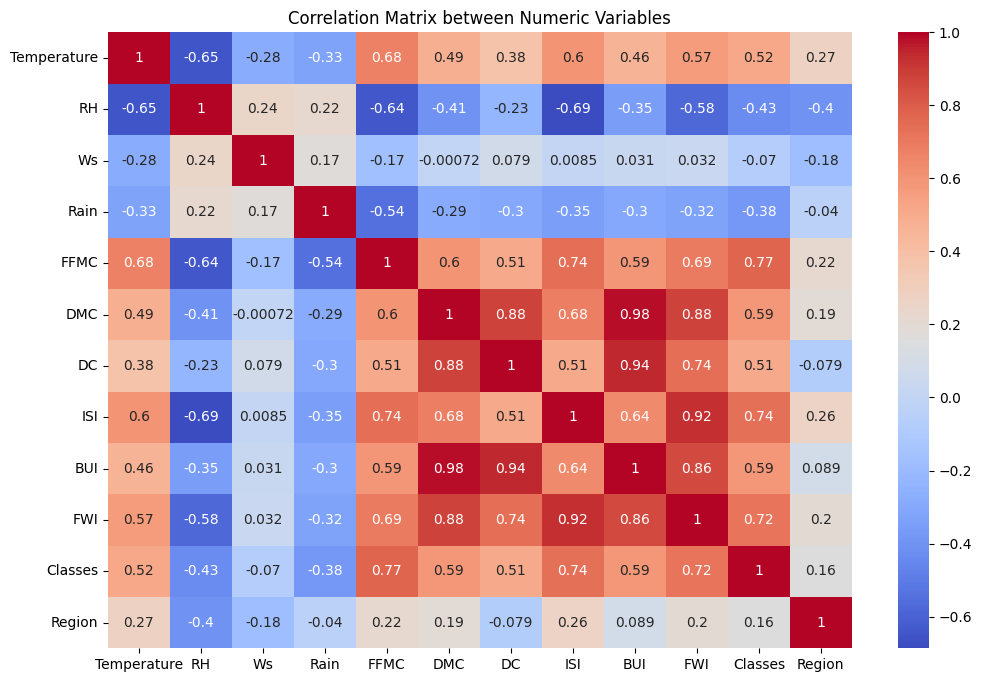

In [10]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Numeric Variables')
plt.show()

## Observations

1. Strong Correlations between Meteorological Variables:
    - DMC and DC have an extremely high correlation (0.88), indicating that both variables are closely related to the accumulated dryness of the soil and fuel material.
    - BUI (Build-Up Index) has a very strong correlation with DMC (0.98) and DC (0.94), which is consistent since the BUI is calculated from these two variables.

2. Fire Burning Index (FWI):
    - The FWI shows a high correlation with ISI (0.92) and with other meteorological variables such as FFMC (0.69) and DMC (0.88).
    - This confirms that the FWI is strongly influenced by fuel moisture conditions and wind speed, and is a key variable for predicting fires.

3. Relationship with the Target Variable ('Classes'):
    - The variables FFMC (0.77), ISI (0.74), and FWI (0.72) have a notably positive correlation with the fire class.
    - This indicates that as these indices increase, so does the probability of a fire occurring.

4. Temperature and Relative Humidity:
    - Temperature is positively correlated with the fire class (0.52), while relative humidity (RH) has a negative correlation (-0.43), which is intuitive: higher temperatures and lower humidity indicate a greater risk of fire.

5. Rain:
    - It has weak negative correlations with fire-related variables such as FFMC (-0.54), ISI (-0.35), and FWI (-0.32), indicating that the presence of rain reduces the risk of fire.

### Model Development and Analysis

In [14]:
# Dataset Division
X = df.drop(['Classes', 'date', 'FWI'], axis=1) # Exclude 'Date' or other datetime type columns
y = df['FWI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Standardization

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Regression models

# Simple linear regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Ridge (L2)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# Lasso (L1)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

In [24]:
def eval_model(name, y_test, y_pred): 
    print(f"{name} → MSE: {mean_squared_error(y_test, y_pred):.2f}, RMSE: {root_mean_squared_error(y_test, y_pred):.2f}, R²: {r2_score(y_test, y_pred):.2f}")

eval_model("Linear Regression", y_test, y_pred_lr)
eval_model("Ridge Regression", y_test, y_pred_ridge)
eval_model("Lasso Regression", y_test, y_pred_lasso)

Linear Regression → MSE: 0.37, RMSE: 0.61, R²: 0.99
Ridge Regression → MSE: 0.54, RMSE: 0.74, R²: 0.98
Lasso Regression → MSE: 0.54, RMSE: 0.73, R²: 0.98


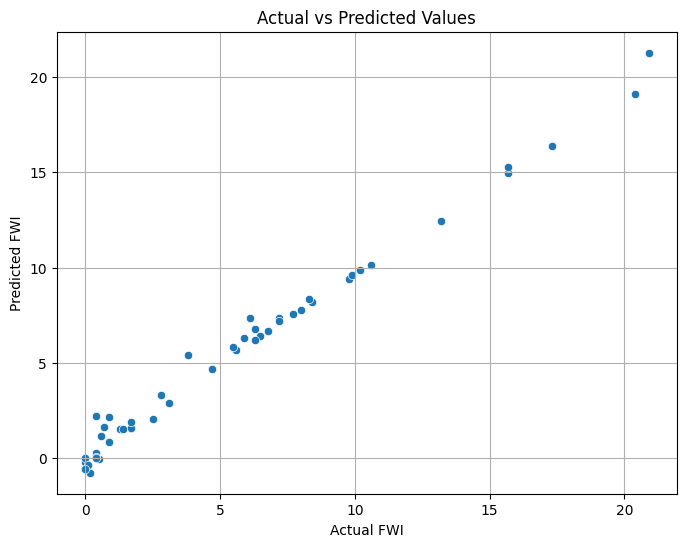

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.grid(True)
plt.show()

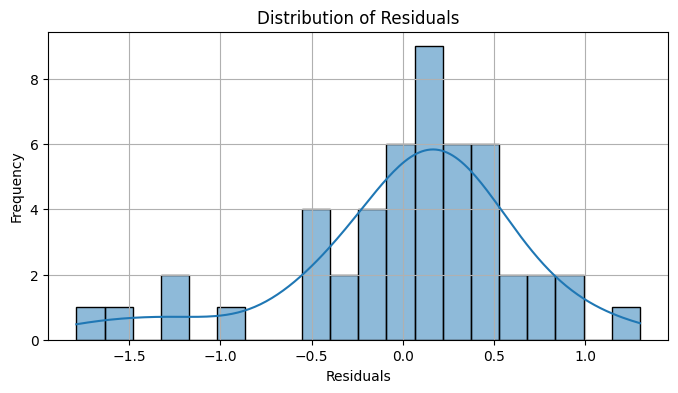

In [29]:
residuals = y_test - y_pred_lr
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, bins=20)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### Residual Analysis

The residual distribution plot allows us to assess whether the model's errors are normally distributed, which is a key assumption for linear regression models.

Observations:
- The distribution is approximately symmetrical and bell-shaped, which is a good sign.
- Most of the residuals are centered around zero, indicating that the model is not systematically biased.
- There are some residuals further from zero (outliers), but they are not excessive and do not clearly break normality.

**Conclusion:**
The shape of the distribution suggests that the linear regression model is making reasonable predictions and that its errors are random, which reinforces the model's validity.

In [18]:
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=5)
ridge_cv.fit(X_train_scaled, y_train)

lasso_cv = LassoCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=5)
lasso_cv.fit(X_train_scaled, y_train)

print("Best alpha for Ridge:", ridge_cv.alpha_)
print("Best alpha for Lasso:", lasso_cv.alpha_)

Best alpha for Ridge: 1.0
Best alpha for Lasso: 0.01


In [25]:
y_pred_ridge_cv = ridge_cv.predict(X_test_scaled)
y_pred_lasso_cv = lasso_cv.predict(X_test_scaled)

eval_model("RidgeCV", y_test, y_pred_ridge_cv)
eval_model("LassoCV", y_test, y_pred_lasso_cv)

RidgeCV → MSE: 0.54, RMSE: 0.74, R²: 0.98
LassoCV → MSE: 0.40, RMSE: 0.63, R²: 0.99


### Model Evaluation and Testing

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(LinearRegression(), X, y, cv=kf, scoring='r2')

print("Cross-Validation R² Scores:", cv_scores)
print("Promedio R²:", np.mean(cv_scores))

Cross-Validation R² Scores: [0.98776706 0.98748958 0.91908388 0.98938246 0.96956148]
Promedio R²: 0.9706568934449427
